In [118]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

plt.style.use("ggplot")

# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'

dtcol = 'pos_date'
seccol = 'security_id'
start_date = '2010-07-01'
scorecol = 'd7'

## from Spearman rank correlation, d7 has negative IC with fwdretf1, similar magnituide as d9 

big_df = pd.read_csv(os.path.join(data_root, 'known_df_on_data_date.csv.gz'),
                    parse_dates=[dtcol], dtype={seccol: str}, 
                    usecols=[dtcol, seccol, scorecol, 'clip_trisk', 'fwdret_f1', 'sector', 'in_trading_universe'])

In [119]:
print(big_df.head())
print(big_df.dtypes)

  security_id  d7   pos_date  fwdret_f1 in_trading_universe  \
0     1000201 NaN 2010-01-05   0.061447                   N   
1     1004601 NaN 2010-01-05  -0.018519                   N   
2      100701 NaN 2010-01-05  -0.015715                   Y   
3     1007201 NaN 2010-01-05   0.036733                   Y   
4     1009601 NaN 2010-01-05  -0.011088                   N   

                   sector  clip_trisk  
0  Consumer Discretionary         NaN  
1  Information Technology         NaN  
2               Utilities         NaN  
3  Consumer Discretionary         NaN  
4        Consumer Staples         NaN  
security_id                    object
d7                            float64
pos_date               datetime64[ns]
fwdret_f1                     float64
in_trading_universe            object
sector                         object
clip_trisk                    float64
dtype: object


In [120]:

big_df = big_df.loc[big_df[dtcol] >= start_date].dropna(subset=[scorecol])

       security_id      d7   pos_date  fwdret_f1 in_trading_universe  \
351351     2972501 -0.0562 2010-07-01  -0.000847                   Y   
353124     8262901 -0.0698 2010-07-01  -0.033682                   Y   
353875      199401 -0.0897 2010-07-02   0.036063                   Y   
354617     3735901 -0.0370 2010-07-02  -0.004673                   N   
354757     4260001 -0.1669 2010-07-02   0.053241                   Y   

                  sector  clip_trisk  
351351  Consumer Staples   20.671667  
353124         Materials   44.628161  
353875       Industrials   35.513271  
354617        Financials   23.787390  
354757       Industrials   34.146874  


<AxesSubplot:xlabel='pos_date'>

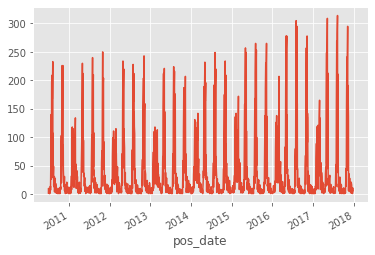

In [121]:
print(big_df.head())
big_df.groupby(dtcol).size().plot()

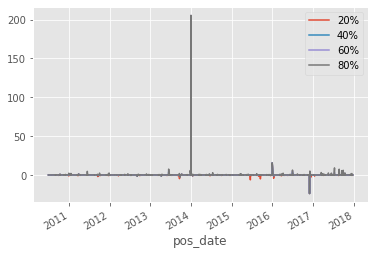

In [122]:
def plot_timeseries_dist(df, scorecol, dtcol, plot_min_max=False):
    
    if plot_min_max:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                 index=['Min', '20%', '40%', '60%', '80%', 'Max']))
    else:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8)],
                 index=['20%', '40%', '60%', '80%']))
    ts_series.unstack().plot()
    
plot_timeseries_dist(big_df, scorecol, dtcol, plot_min_max=False)

In [123]:
big_df[scorecol].describe()


count    69581.000000
mean         0.075397
std         27.773440
min      -1622.000000
25%         -0.165300
50%         -0.078100
75%         -0.025900
max       5919.750000
Name: d7, dtype: float64

In [132]:
big_df[seccol].value_counts()

1613801       32
2972501       31
7010801       31
1613901       31
8262901       31
              ..
8683001        1
7016601        1
1114087201     1
1712201        1
1117026601     1
Name: security_id, Length: 3300, dtype: int64

In [133]:
big_df[big_df[seccol] == '7010801']

security_id      d7   pos_date  fwdret_f1 in_trading_universe  \
355520      7010801  0.0633 2010-07-02  -0.029630                   N   
489659      7010801  0.0620 2010-09-13  -0.005391                   N   
663766      7010801 -0.2279 2010-12-10  -0.012920                   N   
836758      7010801 -0.5355 2011-03-14   0.023529                   N   
1040103     7010801 -0.7746 2011-07-07  -0.002778                   N   
1161235     7010801 -0.6856 2011-09-09  -0.014599                   N   
1328449     7010801 -0.5283 2011-12-12  -0.045802                   N   
1489249     7010801 -0.3165 2012-03-12   0.034125                   N   
1701711     7010801 -0.1928 2012-07-02   0.007316                   Y   
1831962     7010801 -0.2272 2012-09-10  -0.007715                   Y   
1999495     7010801  0.0163 2012-12-10   0.040426                   Y   
2154478     7010801 -0.0791 2013-03-07  -0.013131                   Y   
2376548     7010801 -0.1682 2013-06-27  -0.011881                   Y   
2518565     7010801 -0.1537 2013-09-09  -0.001410                   Y   
2706953     7010801 -0.1565 2013-12-12  -0.016693                   Y   
2862727     7010801 -0.0978 2014-03-06   0.010997                   Y   
3091143     7010801 -0.0056 2014-06-23  -0.026797                   Y   
3236186     7010801 -0.0233 2014-08-28  -0.004496                   Y   
3440252     7010801  0.0118 2014-12-08   0.007269                   Y   
3607073     7010801 -0.0454 2015-03-05  -0.011462                   Y   
3837924     7010801 -0.2502 2015-06-22   0.000000                   Y   
3988551     7010801 -0.2471 2015-08-31   0.016593                   Y   
4203255     7010801 -0.2726 2015-12-10   0.019565                   Y   
4372686     7010801 -0.2181 2016-03-07   0.036623                   Y   
4589545     7010801 -0.2436 2016-06-22  -0.005887                   Y   
4744532     7010801 -0.2475 2016-09-06   0.002504                   Y   
4931881     7010801 -0.1775 2016-12-05  -0.001911                   Y   
5109416     7010801 -0.1653 2017-03-06   0.005252                   Y   
5350210     7010801  0.0042 2017-07-03  -0.018885                   Y   
5485980     7010801  0.0892 2017-09-11   0.052592                   Y   
5664048     7010801  0.0532 2017-12-12  -0.035461                   Y   

                         sector  clip_trisk  
355520   Consumer Discretionary   41.965787  
489659   Consumer Discretionary   41.432005  
663766   Consumer Discretionary   37.793453  
836758   Consumer Discretionary   34.248981  
1040103  Consumer Discretionary   32.913788  
1161235  Consumer Discretionary   37.603816  
1328449  Consumer Discretionary   45.843104  
1489249  Consumer Discretionary   49.136231  
1701711  Consumer Discretionary   55.073099  
1831962  Consumer Discretionary   53.944494  
1999495  Consumer Discretionary   52.726219  
2154478  Consumer Discretionary   54.075056  
2376548  Consumer Discretionary   45.267317  
2518565  Consumer Discretionary   43.949152  
2706953  Consumer Discretionary   36.030536  
2862727  Consumer Discretionary   34.163707  
3091143  Consumer Discretionary   35.053704  
3236186  Consumer Discretionary   34.078717  
3440252  Consumer Discretionary   34.617573  
3607073  Consumer Discretionary   36.755068  
3837924  Consumer Discretionary   35.654259  
3988551  Consumer Discretionary   35.082983  
4203255  Consumer Discretionary   34.056447  
4372686  Consumer Discretionary   37.342397  
4589545  Consumer Discretionary   42.725339  
4744532  Consumer Discretionary   42.049434  
4931881  Consumer Discretionary   46.256897  
5109416  Consumer Discretionary   41.071841  
5350210  Consumer Discretionary   35.395938  
5485980  Consumer Discretionary   36.736759  
5664048  Consumer Discretionary   35.290230

In [134]:
big_df[['d7', 'fwdret_f1']].corr(method='spearman')

d7  fwdret_f1
d7         1.000000  -0.014334
fwdret_f1 -0.014334   1.000000

In [55]:
big_df[f"{scorecol}"].nsmallest(2000)

3632795   -1622.0000
5601756   -1213.3600
5247406    -611.6240
3630339    -561.6680
3591026    -560.8480
             ...    
2791187      -1.0761
4132236      -1.0761
4890057      -1.0760
1275483      -1.0757
2981986      -1.0752
Name: d7, Length: 2000, dtype: float64

In [56]:
big_df[f"{scorecol}"].nlargest(2000)

4681598    5919.7500
4842013    2297.8100
4321591    1569.0900
5604654     963.5400
5137493     930.5330
             ...    
2894395       1.4635
2284500       1.4621
3018222       1.4601
5478501       1.4601
1594370       1.4560
Name: d7, Length: 2000, dtype: float64

In [53]:
big_df[f"{scorecol}"].shape

(69581,)

In [68]:
## this roughly drop 5% of the total data
l, u = big_df[scorecol].quantile(0.025), big_df[scorecol].quantile(0.975)
print(l, u)

-1.1998 1.73095


In [70]:
print(big_df.head())

       security_id      d7   pos_date  fwdret_f1 in_trading_universe  \
351351     2972501 -0.0562 2010-07-01  -0.000847                   Y   
353124     8262901 -0.0698 2010-07-01  -0.033682                   Y   
353875      199401 -0.0897 2010-07-02   0.036063                   Y   
354617     3735901 -0.0370 2010-07-02  -0.004673                   N   
354757     4260001 -0.1669 2010-07-02   0.053241                   Y   

                  sector  clip_trisk  
351351  Consumer Staples   20.671667  
353124         Materials   44.628161  
353875       Industrials   35.513271  
354617        Financials   23.787390  
354757       Industrials   34.146874  


In [71]:
big_df = big_df.loc[big_df[scorecol].between(l, u)]

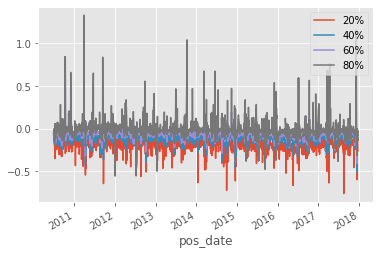

In [72]:
plot_timeseries_dist(big_df, f"{scorecol}", dtcol, plot_min_max=False)

<AxesSubplot:>

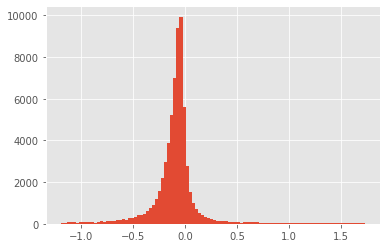

In [73]:
big_df[f"{scorecol}"].hist(bins=100)
## the data has been normalized already

In [74]:
rsch_universe = big_df.loc[big_df['in_trading_universe'] == 'Y', ['pos_date', seccol]].copy()

In [75]:
big_df = big_df.merge(rsch_universe)

In [76]:
big_df.head()

security_id      d7   pos_date  fwdret_f1 in_trading_universe  \
0     2972501 -0.0562 2010-07-01  -0.000847                   Y   
1     8262901 -0.0698 2010-07-01  -0.033682                   Y   
2      199401 -0.0897 2010-07-02   0.036063                   Y   
3     4260001 -0.1669 2010-07-02   0.053241                   Y   
4     4765001 -0.0198 2010-07-02   0.008453                   Y   

             sector  clip_trisk  
0  Consumer Staples   20.671667  
1         Materials   44.628161  
2       Industrials   35.513271  
3       Industrials   34.146874  
4         Materials   26.791100

In [77]:
import pandas as np
import numpy as np

def ztrend(df, scorecol, lookback, mindata, dtcol, symcol=seccol):
    
    df = df.copy()
    df.sort_values(by=[dtcol, symcol], inplace=True)
    
    ptable = pd.pivot_table(df, index=dtcol, columns=symcol, values=scorecol)
    
    mu_ptable = ptable.rolling(window=lookback, min_periods=mindata).mean()
    sigma_ptable = ptable.rolling(window=lookback, min_periods=mindata).std()
    
    zscore_ptable = (ptable - mu_ptable) / sigma_ptable
    df_zscore = pd.melt(zscore_ptable.reset_index(), id_vars=[dtcol])
    df = df.merge(df_zscore, on=[dtcol, symcol], how='left')
    
    return df['value'].values


def wins_qnt_score(df, scorecol, dtcol, qmin=0.05, qmax=0.95):
    def _helper(x):
        l, u = np.nanquantile(x, qmin), np.quantile(x, qmax)
        x[x >= u] = u
        x[x <= l] = l
        return x
    return df.groupby(dtcol)[scorecol].transform(_helper)

def std_qnt_score(df, scorecol, dtcol, demean=True):
    return df.groupby(dtcol)[scorecol].transform(lambda x: (x - x.mean()) / x.std())

In [78]:
big_df['std_score'] = wins_qnt_score(big_df, f"{scorecol}", 'pos_date', qmin=0.05, qmax=0.95)
big_df['std_score'] = std_qnt_score(big_df, 'std_score', 'pos_date', demean=True)
big_df['std_score'] = big_df['std_score'].clip(-3, 3)
## guess d9 is short interest after capping to 100%
big_df['std_score'] = -big_df['std_score']

In [79]:
big_df['hld'] = big_df['std_score'] / np.power(big_df['clip_trisk'], 2)
big_df['hld_wgt'] =big_df.groupby('pos_date')['hld'].transform(lambda x: x / x.abs().sum())

In [80]:
big_df.loc[big_df['hld_wgt'] > 0].groupby('pos_date')['hld_wgt'].sum()

pos_date
2010-07-01    0.176651
2010-07-02    0.602644
2010-07-08    0.524942
2010-07-12    0.515251
2010-07-14    0.557992
                ...   
2017-12-13    0.725370
2017-12-15    0.480673
2017-12-18    0.605348
2017-12-21    0.616214
2017-12-22    0.340758
Name: hld_wgt, Length: 1592, dtype: float64

<AxesSubplot:xlabel='pos_date'>

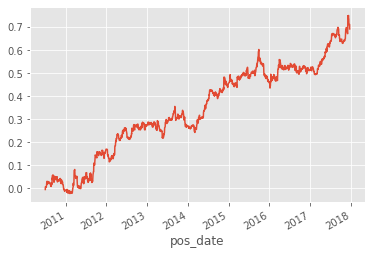

In [81]:
big_df['attr_fwdretf1'] = big_df['hld_wgt'] * big_df['fwdret_f1']
big_df.groupby('pos_date')['attr_fwdretf1'].apply(lambda x: x.sum()).cumsum().plot()

In [114]:
def quickstats(df, scorecol, riskcol, riskpower=2, retcol='fwdret_f1', dtcol='pos_date', seccol='security_id'):
    
    df = df.copy()
    
    
    ### get portfolio performance stats
    df['hld'] = df[scorecol] / np.power(df[riskcol], riskpower)
    df['hld_wgt'] =df.groupby(dtcol)['hld'].transform(lambda x: x / x.abs().sum())
    
    df['attr_fwdretf1'] = df['hld_wgt'] * df[retcol]
    xxx = df.groupby(dtcol, as_index=False)['attr_fwdretf1'].apply(lambda x: x.sum())
    xxx['year'] = xxx['pos_date'].dt.year
    
    ann_stats = xxx.groupby('year')['attr_fwdretf1'].apply(
        lambda x: pd.Series([x.mean() * 252, x.std() * np.sqrt(252), x.shape[0]],
                            index=['AnnRet', 'AnnVol', 'Days'])).unstack()
    ann_stats['AnnSR'] = ann_stats['AnnRet'] / ann_stats['AnnVol']
    
    ### 
    ncount = df.groupby(dtcol, as_index=False)[scorecol].size()
    
    return ann_stats.append(ncount)

In [115]:
xxx = quickstats(big_df, 'std_score', 'clip_trisk')

In [111]:
### xxx
ncount = big_df.groupby(dtcol, as_index=False)[scorecol].size()
print(ncount.tail())

       pos_date  size
1722 2017-12-15     2
1723 2017-12-18     6
1724 2017-12-20     2
1725 2017-12-21    10
1726 2017-12-22     6


In [113]:
big_df.groupby(dtcol)[scorecol].size()

pos_date
2010-07-01     2
2010-07-02     6
2010-07-08     3
2010-07-09     1
2010-07-12     3
              ..
2017-12-15     2
2017-12-18     6
2017-12-20     2
2017-12-21    10
2017-12-22     6
Name: d7, Length: 1727, dtype: int64

In [116]:
xxx

AnnRet    AnnVol   Days     AnnSR   pos_date  size
2010 -0.016887  0.096835  117.0 -0.174387        NaT   NaN
2011  0.194311  0.125790  230.0  1.544728        NaT   NaN
2012  0.110071  0.096646  226.0  1.138906        NaT   NaN
2013  0.001564  0.096893  231.0  0.016144        NaT   NaN
2014  0.201735  0.100681  232.0  2.003706        NaT   NaN
...        ...       ...    ...       ...        ...   ...
1722       NaN       NaN    NaN       NaN 2017-12-15   2.0
1723       NaN       NaN    NaN       NaN 2017-12-18   6.0
1724       NaN       NaN    NaN       NaN 2017-12-20   2.0
1725       NaN       NaN    NaN       NaN 2017-12-21  10.0
1726       NaN       NaN    NaN       NaN 2017-12-22   6.0

[1735 rows x 6 columns]